# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pay=pd.read_csv('paygap.csv')
speed=pd.read_csv('speeddating.csv')
# oscar=pd.read_csv('oscars.csv', encoding = "ISO-8859-1")

In [3]:
# oscar.head()

In [4]:
# pay.head()

In [5]:
speed.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


could look at religion, race, attractiveness. can also look at correlation between interests (shared interests). dataset includes answers to questionaires about the following:
- (`pref_o`) what my partner looks for
- (`_o`) what my partner rated
- (`_important`) what do i look for in a partner
- (`_partner`) what do i rate my partner
- no added tag --> what do i think of myself

In [6]:
# delete columns which just show the distribution buckets
clean_speed = speed[speed.columns.drop(list(speed.filter(regex='d_')))]

# fix match column
clean_speed['match']=clean_speed['match'].str.extract('(\d+)').astype(int)

clean_speed=clean_speed.dropna()
clean_speed=clean_speed.drop(columns='has_null')

/var/folders/b2/l0lz0mt92bz_gxp755km9blm0000gn/T/ipykernel_58929/2855528146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_speed['match']=clean_speed['match'].str.extract('(\d+)').astype(int)


In [7]:
str_df = clean_speed.select_dtypes(exclude=np.number)
str_df

,gender,race,race_o,samerace,field,decision,decision_o
0,b'female',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',b'Law',b'1',b'0'
1,b'female',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',b'Law',b'1',b'0'
3,b'female',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',b'Law',b'1',b'1'
4,b'female',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',b'Law',b'1',b'1'
5,b'female',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',b'Law',b'0',b'1'
...,...,...,...,...,...,...,...
8370,b'male',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',b'Climate Dynamics',b'0',b'1'
8372,b'male',b'European/Caucasian-American',b'European/Caucasian-American',b'1',b'Climate Dynamics',b'0',b'0'
8374,b'male',b'European/Caucasian-American',b'Other',b'0',b'Climate Dynamics',b'0',b'0'
8375,b'male',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',b'Climate Dynamics',b'0',b'0'


In [8]:
# clean up string
str_df = str_df.apply(lambda x: x.str.split("'").str[1])

# change to integer
str_df[['samerace', 'decision', 'decision_o']]=str_df[['samerace', 'decision', 'decision_o']].astype(int)

# set dataframe
clean_speed[['gender', 'race', 'race_o', 'samerace', 'field', 'decision', 'decision_o']]=str_df

In [9]:
clean_speed.columns

Index(['wave', 'gender', 'age', 'age_o', 'race', 'race_o', 'samerace',
       'importance_same_race', 'importance_same_religion', 'field',
       'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'attractive_o', 'sinsere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'attractive_important',
       'sincere_important', 'intellicence_important', 'funny_important',
       'ambtition_important', 'attractive', 'sincere', 'intelligence', 'funny',
       'ambition', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner', 'sports',
       'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
       'shopping', 'yoga', 'interests_correlate', 'like', 'guess_prob_liked',
       'met', 'decision', 'decision_o', 'match'],
      dtype='object')

In [10]:
clean_speed

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,...,music,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match
0,1.0,female,21.0,27.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,9.0,8.0,1.0,0.14,7.0,6.0,0.0,1,0,0
1,1.0,female,21.0,22.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,9.0,8.0,1.0,0.54,7.0,5.0,1.0,1,0,0
3,1.0,female,21.0,23.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,9.0,8.0,1.0,0.61,7.0,6.0,0.0,1,1,1
4,1.0,female,21.0,24.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,Law,...,9.0,8.0,1.0,0.21,6.0,6.0,0.0,1,1,1
5,1.0,female,21.0,25.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,9.0,8.0,1.0,0.25,6.0,5.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,21.0,male,25.0,27.0,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0,1.0,1.0,Climate Dynamics,...,10.0,7.0,3.0,0.35,6.0,6.0,0.0,0,1,0
8372,21.0,male,25.0,24.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Climate Dynamics,...,10.0,7.0,3.0,0.28,4.0,4.0,0.0,0,0,0
8374,21.0,male,25.0,24.0,European/Caucasian-American,Other,0,1.0,1.0,Climate Dynamics,...,10.0,7.0,3.0,0.71,4.0,4.0,0.0,0,0,0
8375,21.0,male,25.0,29.0,European/Caucasian-American,Latino/Hispanic American,0,1.0,1.0,Climate Dynamics,...,10.0,7.0,3.0,-0.46,6.0,5.0,0.0,0,0,0


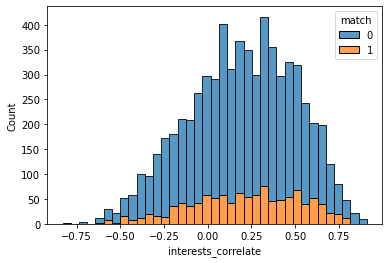

In [11]:
sns.histplot(x='interests_correlate', hue='match',data=clean_speed, multiple="stack")
plt.show()

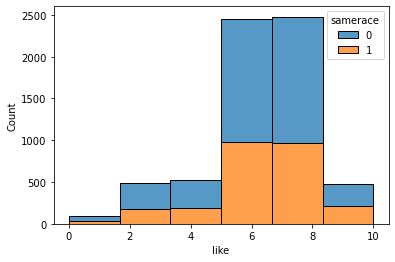

In [12]:
sns.histplot(x='like', hue='samerace', data=clean_speed, multiple="stack", bins=6)
plt.show()

In [13]:
numbers = clean_speed.select_dtypes(include=np.number)

In [14]:
numbers.columns

Index(['wave', 'age', 'age_o', 'samerace', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'attractive', 'sincere',
       'intelligence', 'funny', 'ambition', 'attractive_partner',
       'sincere_partner', 'intelligence_partner', 'funny_partner',
       'ambition_partner', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'interests_correlate', 'like', 'guess_prob_liked', 'met', 'decision',
       'decision_o', 'match'],
      dtype='object')

In [24]:
corr_df = numbers[['age', 'age_o', 'samerace', 'importance_same_race', 
       'importance_same_religion', 'pref_o_attractive', 'attractive_o',
                  'attractive_important', 'attractive', 'attractive_partner',
                   'sincere_partner', 'funny_partner',
                  'interests_correlate', 'like', 'guess_prob_liked', 'match']]

In [25]:
corr = corr_df.corr()

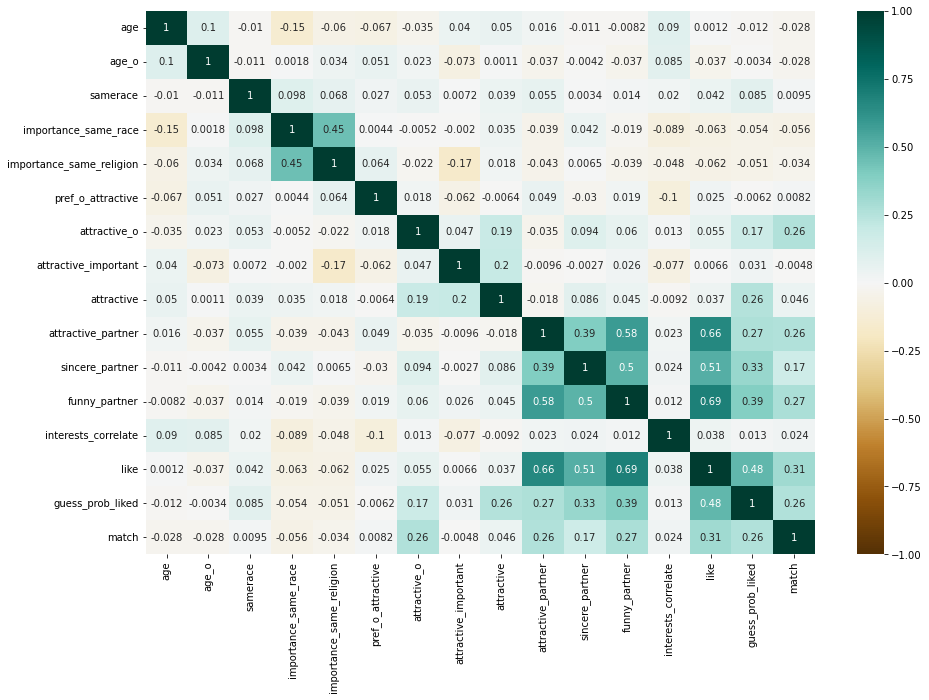

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(data=corr, vmin=-1, vmax=1, cmap='BrBG', annot=True)
plt.show()

Correlation between `like` and `attractive_partner`, `sincere_partner`, `funny_partner` (rating your partner as attractive, sincere, funny). Possible correlation between `importance_same_religion` and `importance_same_race`.

Correlation between `match` and `attractive_o`, `attractive_partner`, and `like`.

## Ideas

- could compare the different values of female and male participants: what is more important for a participant to like their partner--shared interest? attractiveness? same race/religion? sense of humour?
    - users can filter between different participant demographics such as `gender`, `age`, `field`
- could look at how people view themselves vs how their partner views them
    - do participants speak highly of themselves or lowly? 
- We could look at whether race affects values - who they find more attractive? filter by race
    - Could also look whether different age groups prioritise different things - filter by age
**ADD ANY OTHER IDEAS!**